<a href="https://colab.research.google.com/github/DataEtnos/Dashboard-de-vendas-de-jogos-de-video-game/blob/main/TECNICAS%20DE%20%20CLUSTERIZA%C3%87%C3%83O%20DE%20DADOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
%%capture
%pip install kmodes

In [129]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [130]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [131]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,4.349451,-10.037878
1,9.766397,-2.384765
2,7.183656,-8.712756
3,-8.485660,-7.944731
4,6.429599,-9.572354


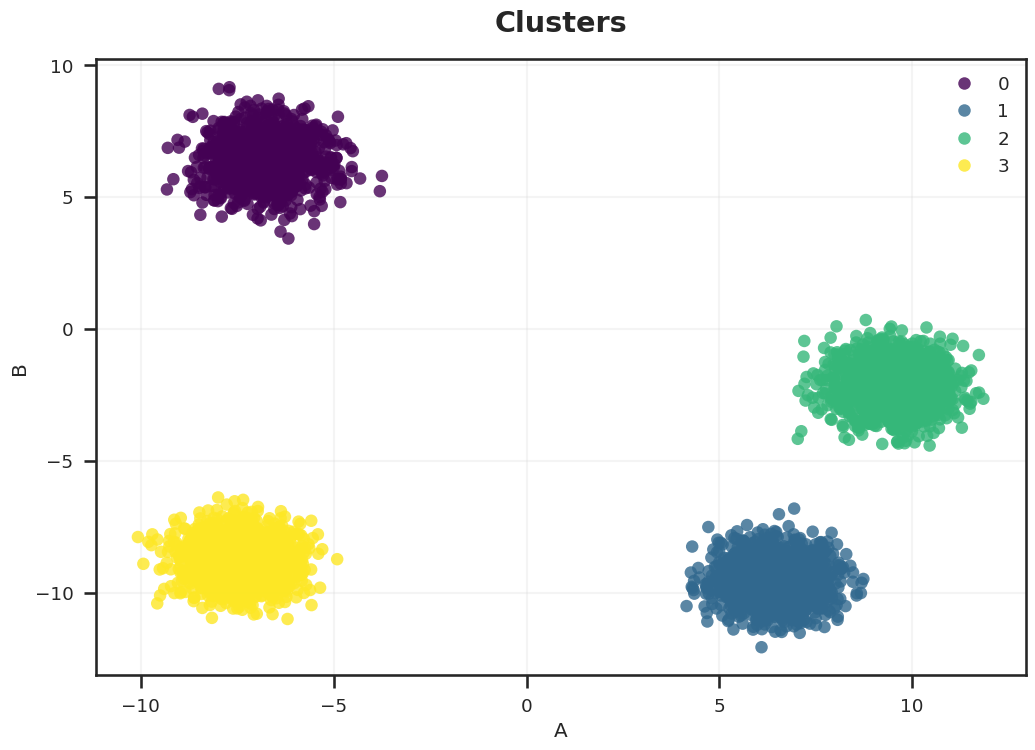

In [132]:
sns.scatterplot(data=df, x='A', y='B', hue = y, **scatter_kwargs)
plt.title('Clusters');


In [133]:
centroides ,  labels , inercia = k_means(df, n_clusters= 4 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [134]:
k_means?

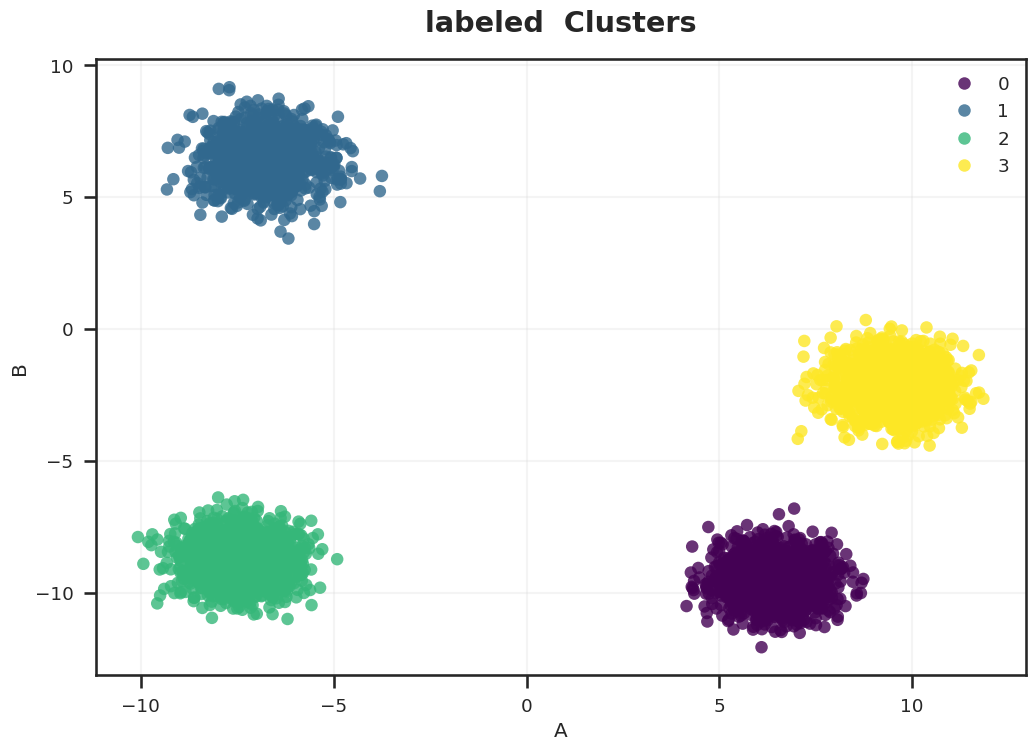

In [135]:
 sns.scatterplot(data = df , x = 'A',y= 'B', hue = labels, **scatter_kwargs)



plt.title('labeled  Clusters')
plt.show()

In [136]:
modelo =  KMeans(  n_clusters= 4 )
modelo.fit(df)


centroides = modelo.cluster_centers_
labels = modelo.labels_
inercia = modelo.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [137]:
print(centroides)
print(labels)
print(inercia)

[[-7.44670357 -8.75147219]
 [ 6.43103856 -9.51429625]
 [ 9.49855677 -2.12250284]
 [-6.78488593  6.41177936]]
[1 2 1 ... 3 1 0]
6436.059847803831


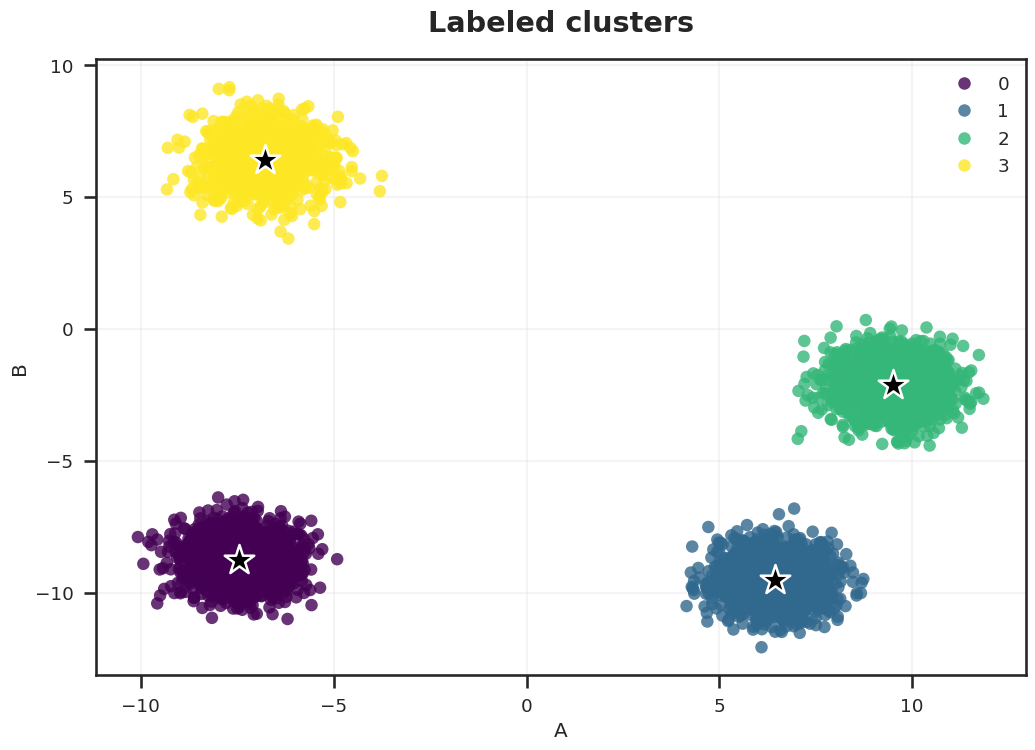

In [138]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

In [139]:
#metricas

print(silhouette_score(df, labels))
print(davies_bouldin_score(df, labels))
print(calinski_harabasz_score(df, labels))

0.8619258689096725
0.19414289381602426
128158.62604037394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

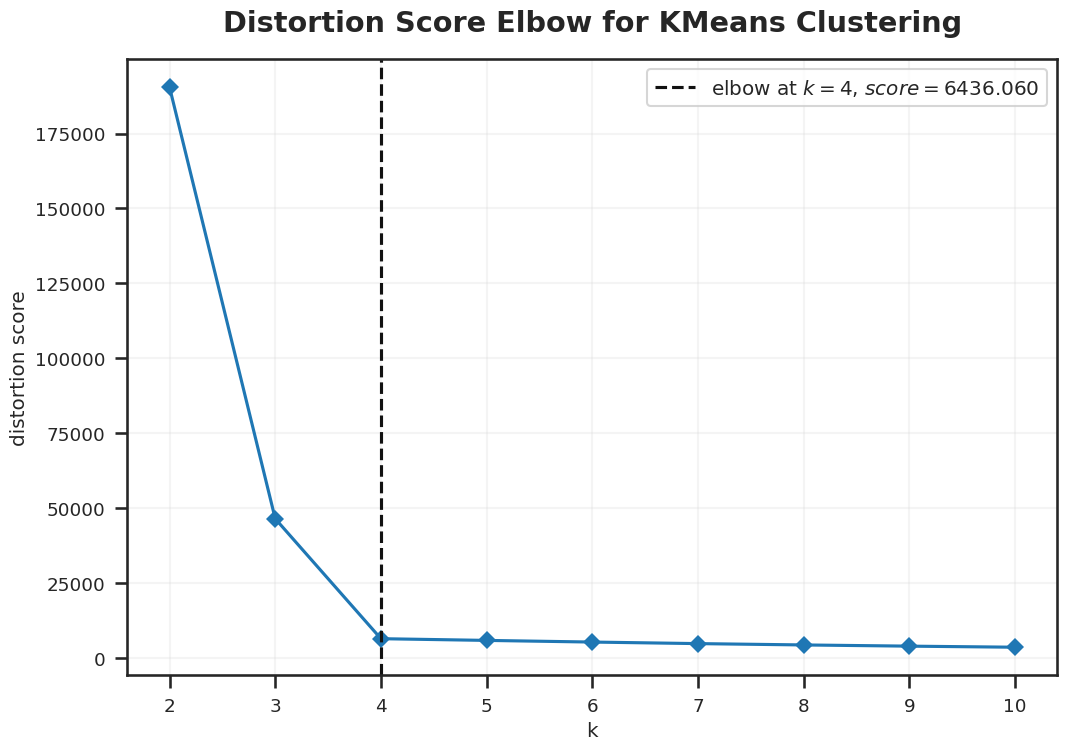

In [140]:
kelbow_visualizer(modelo, df, k=10, timings=False);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

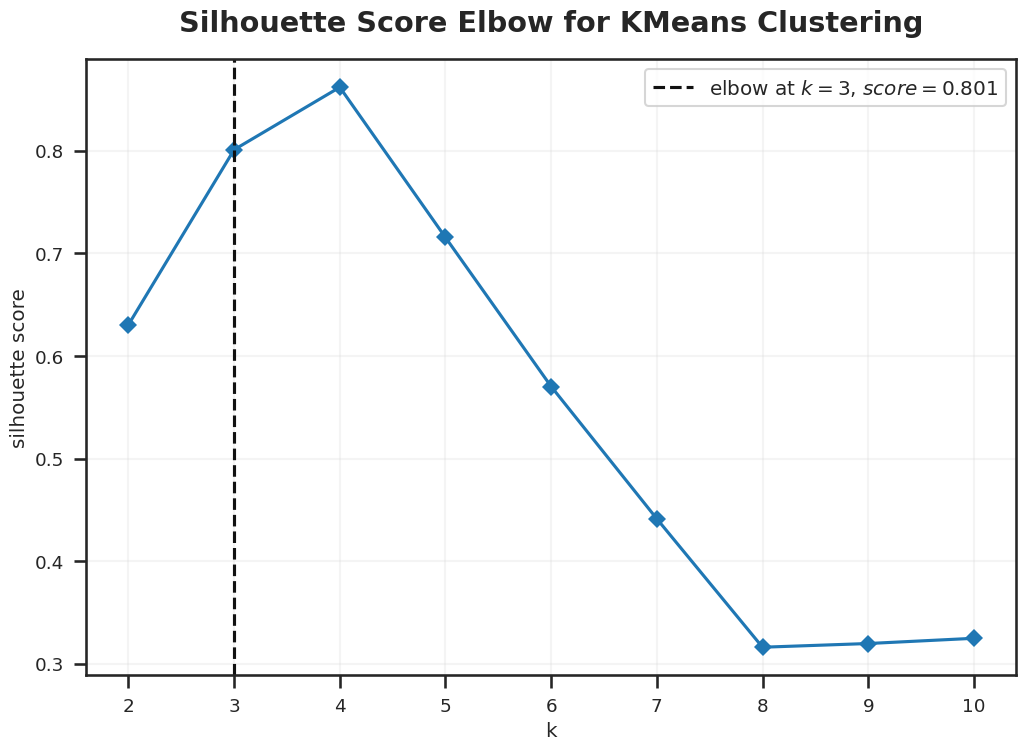

In [141]:
kelbow_visualizer(modelo, df, k=10, timings=False, metric='silhouette');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



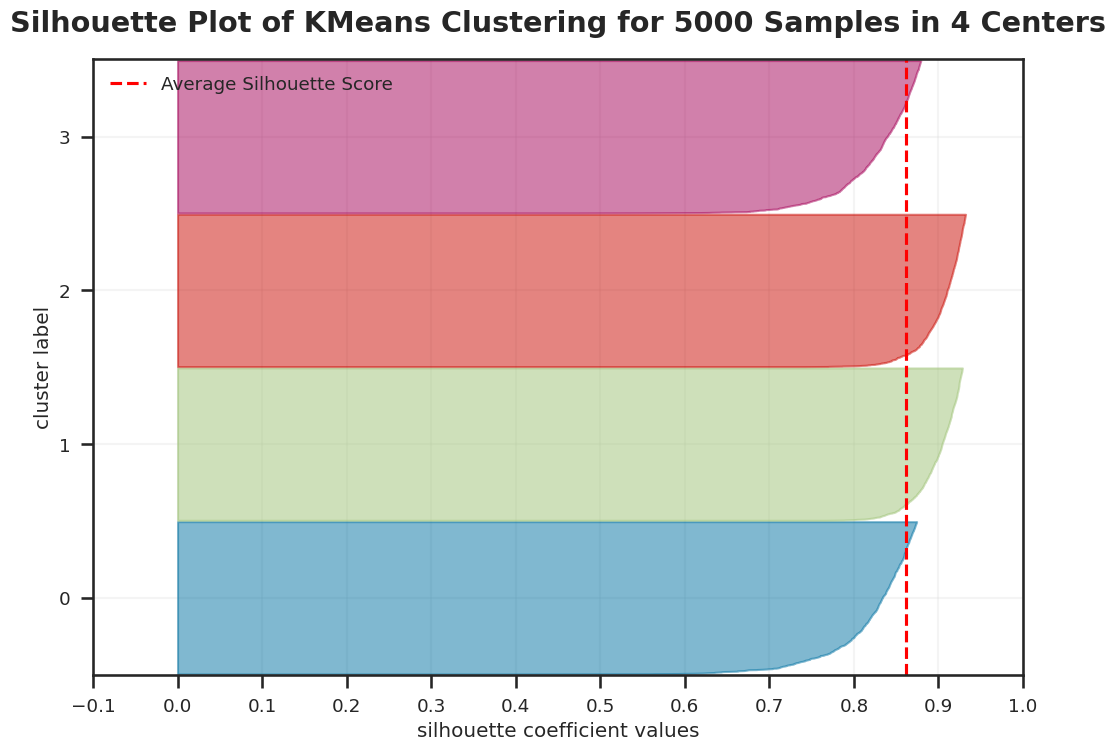

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [142]:
silhouette_visualizer(KMeans(n_clusters=4), df, colors='yellowbrick')

In [143]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(df)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(df, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

[{'k': 2,
  'inertia': 190442.60849170943,
  'silhouette_score': 0.6303990579584823,
  'davies_bouldin_score': 0.7423202650755535,
  'calinski_harabasz_score': 8169.5773871513475},
 {'k': 3,
  'inertia': 46466.233460956035,
  'silhouette_score': 0.8010370717623363,
  'davies_bouldin_score': 0.30498009477556737,
  'calinski_harabasz_score': 24479.865407877514},
 {'k': 4,
  'inertia': 6436.059847803831,
  'silhouette_score': 0.8619258689096725,
  'davies_bouldin_score': 0.19414289381602423,
  'calinski_harabasz_score': 128158.62604037394},
 {'k': 5,
  'inertia': 5864.502790625897,
  'silhouette_score': 0.7151436437072686,
  'davies_bouldin_score': 0.618720553749126,
  'calinski_harabasz_score': 105596.09995119664},
 {'k': 6,
  'inertia': 5383.350020858207,
  'silhouette_score': 0.5647599897673002,
  'davies_bouldin_score': 0.9287957085506915,
  'calinski_harabasz_score': 92114.45453267496},
 {'k': 7,
  'inertia': 4841.199215498881,
  'silhouette_score': 0.438716545526723,
  'davies_bould

In [144]:
#identificando os melhores valores
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,190442.608492,0.630399,0.742320,8169.577387
3,46466.233461,0.801037,0.304980,24479.865408
4,6436.059848,0.861926,0.194143,128158.626040
5,5864.502791,0.715144,0.618721,105596.099951
6,5383.350021,0.564760,0.928796,92114.454533
7,4841.199215,0.438717,1.093105,85434.580908
8,4293.042193,0.316501,1.234542,82667.771828
9,3947.345578,0.320327,1.135317,78686.805632
10,3607.491894,0.322837,1.063019,76576.038123


In [145]:
# estilizando e indentificando os melhores valores sejam eles positivo ou negativo, isso depende de cada estilo de metricas.
# Por exemplo os valores que são melhores positivo são o calinski , silhoutte.
# o melhor valor negativo e o davis
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,190442.608492,0.630399,0.742320,8169.577387
3,46466.233461,0.801037,0.304980,24479.865408
4,6436.059848,0.861926,0.194143,128158.626040
5,5864.502791,0.715144,0.618721,105596.099951
6,5383.350021,0.564760,0.928796,92114.454533
7,4841.199215,0.438717,1.093105,85434.580908
8,4293.042193,0.316501,1.234542,82667.771828
9,3947.345578,0.320327,1.135317,78686.805632
10,3607.491894,0.322837,1.063019,76576.038123


In [146]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.46523167, 0.19399392],
       [0.84817908, 0.45311672],
       [0.36196124, 0.17418011],
       ...,
       [0.46900478, 0.51777056],
       [0.94593873, 0.64552395],
       [0.71986753, 0.06922194]])

In [147]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,514.998002,0.357233,1.170499,3072.755405
3,327.793611,0.379667,0.868268,3840.284257
4,205.232014,0.412987,0.766499,5082.735501
5,173.193107,0.393378,0.835577,4747.415490
6,145.563118,0.380980,0.846471,4707.442226
7,125.859258,0.355235,0.916314,4666.499493
8,106.025290,0.361623,0.811322,4880.573028
9,91.559030,0.367200,0.785374,5042.708240
10,83.316342,0.360469,0.824198,4979.811135


In [148]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,514.998002,0.357233,1.170499,3072.755405
3,327.793611,0.379667,0.868268,3840.284257
4,205.232014,0.412987,0.766499,5082.735501
5,173.193107,0.393378,0.835577,4747.415490
6,145.563118,0.380980,0.846471,4707.442226
7,125.859258,0.355235,0.916314,4666.499493
8,106.025290,0.361623,0.811322,4880.573028
9,91.559030,0.367200,0.785374,5042.708240
10,83.316342,0.360469,0.824198,4979.811135


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

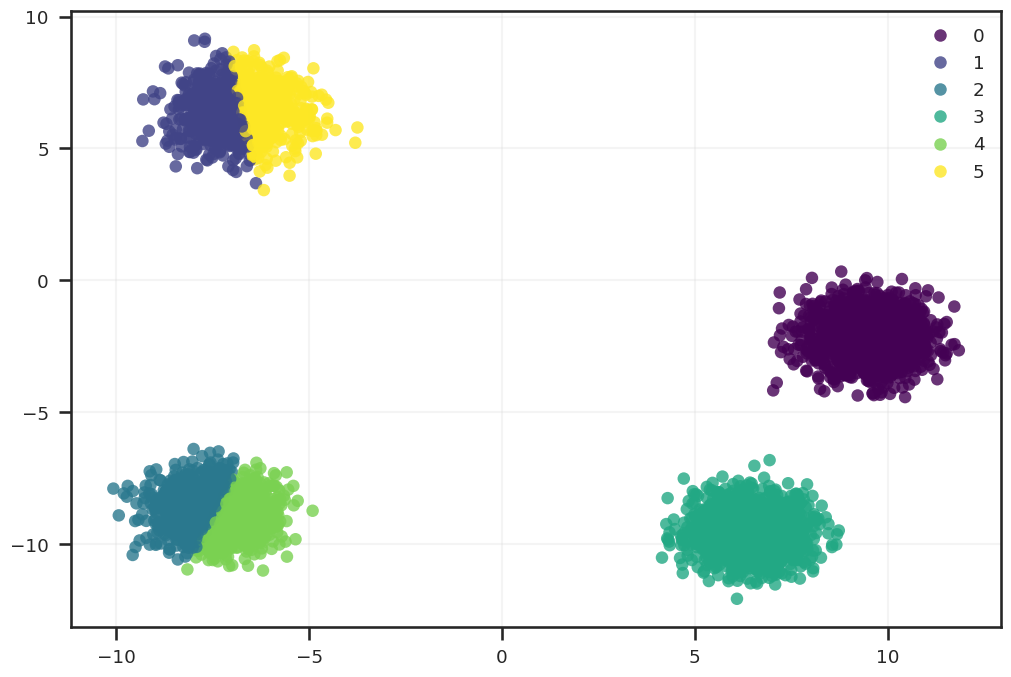

In [149]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

#DIMENSIONALIDADE


In [150]:
#SIMULANDO DADOS

X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [151]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [152]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


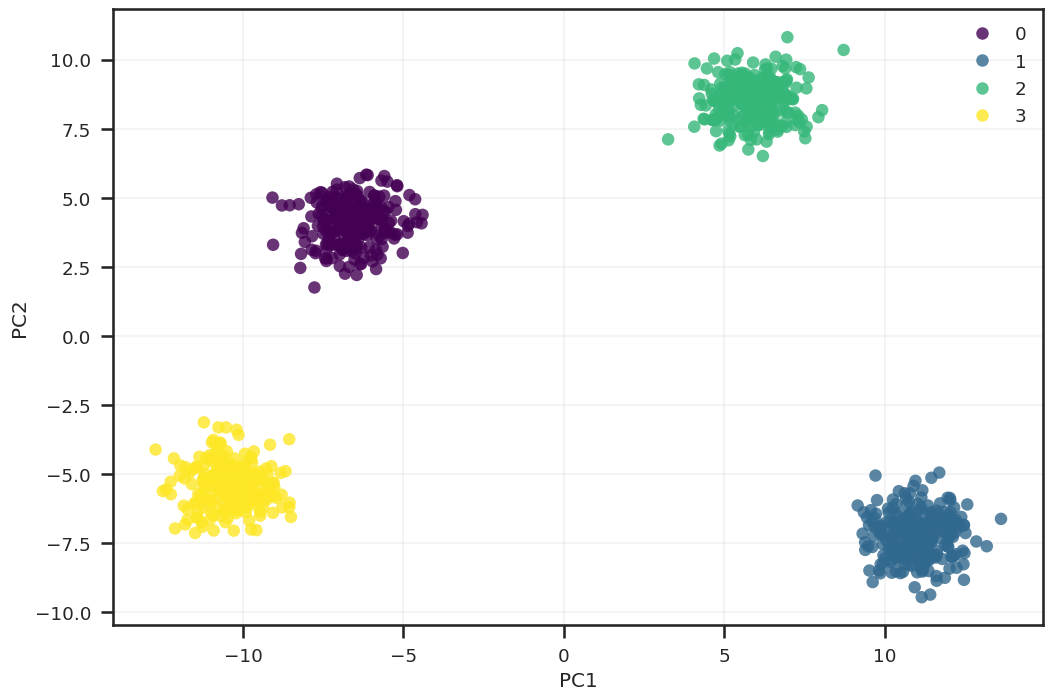

In [153]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



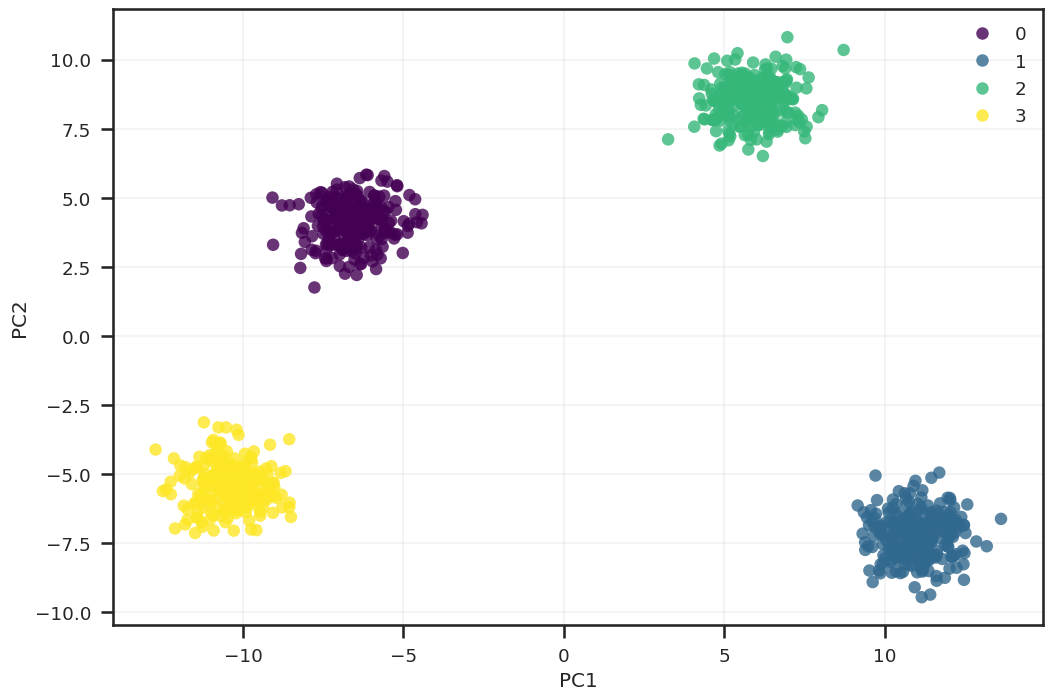

In [154]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [155]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

#Clusterização Hierarquica


In [156]:
#dados sinteticos
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [157]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

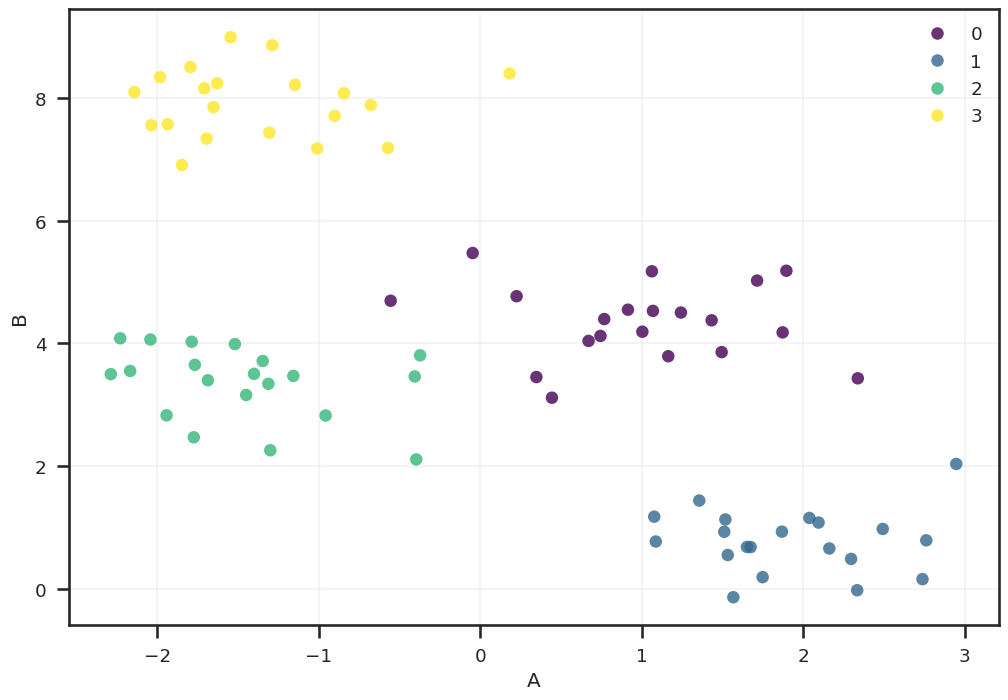

In [158]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

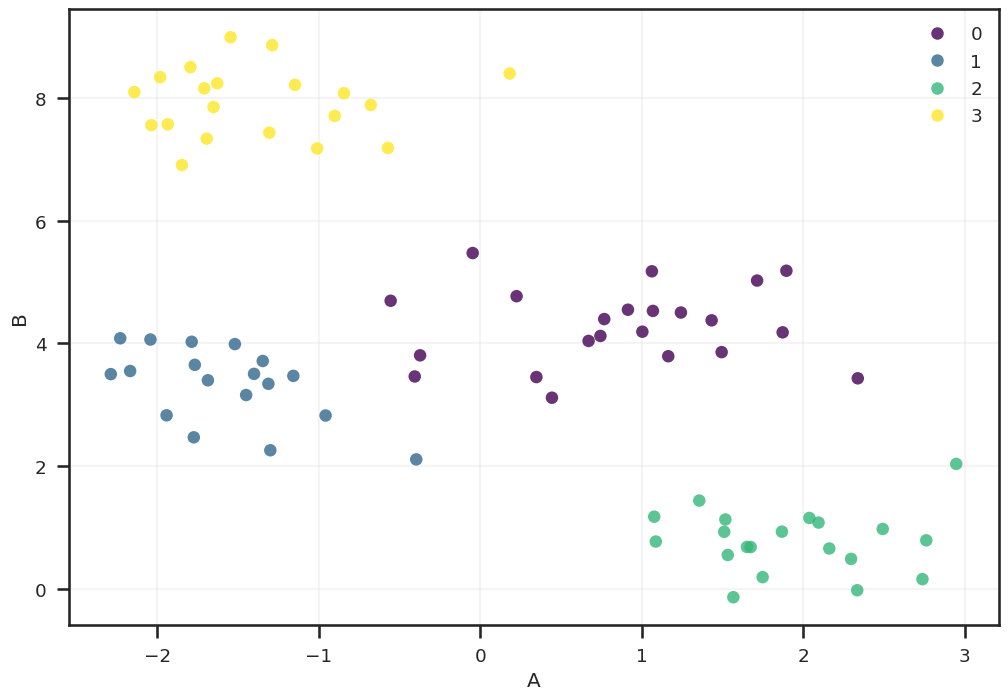

In [159]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

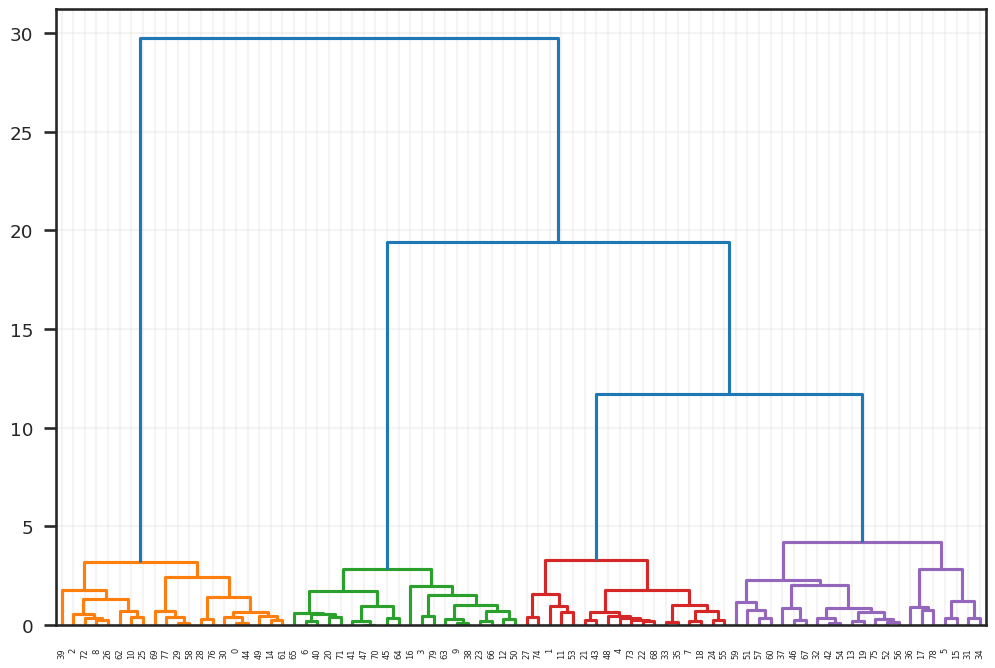

In [160]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [161]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [162]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

#DBSCAN


In [163]:
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [164]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [165]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

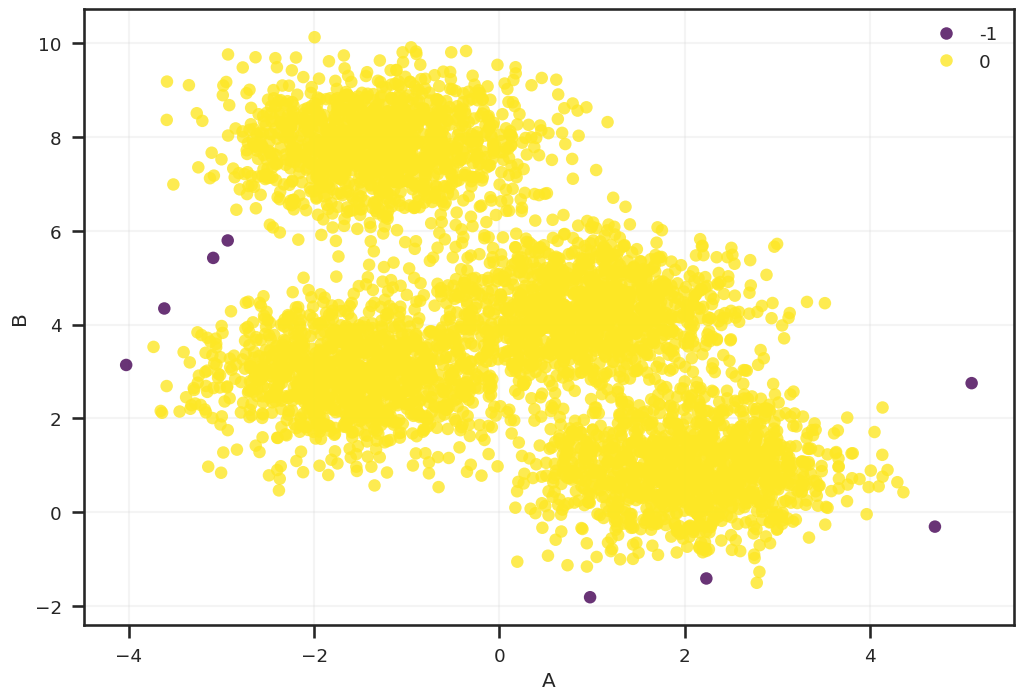

In [166]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [167]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10') #ALTERE
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

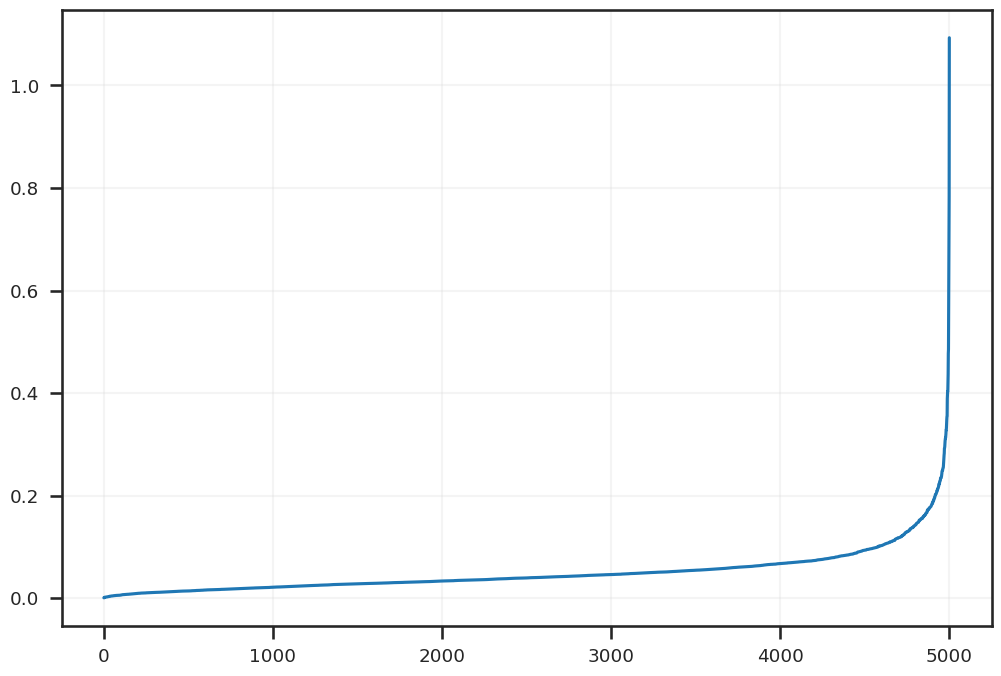

In [168]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


# Aqui usamos o nearest neighbors para  retirar um grafico parecido com o cotovelo, aonde o numero da curva vai ser o que usaremos para definir o EPS .
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

In [169]:
#simulando dados
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


<Axes: xlabel='A', ylabel='B'>

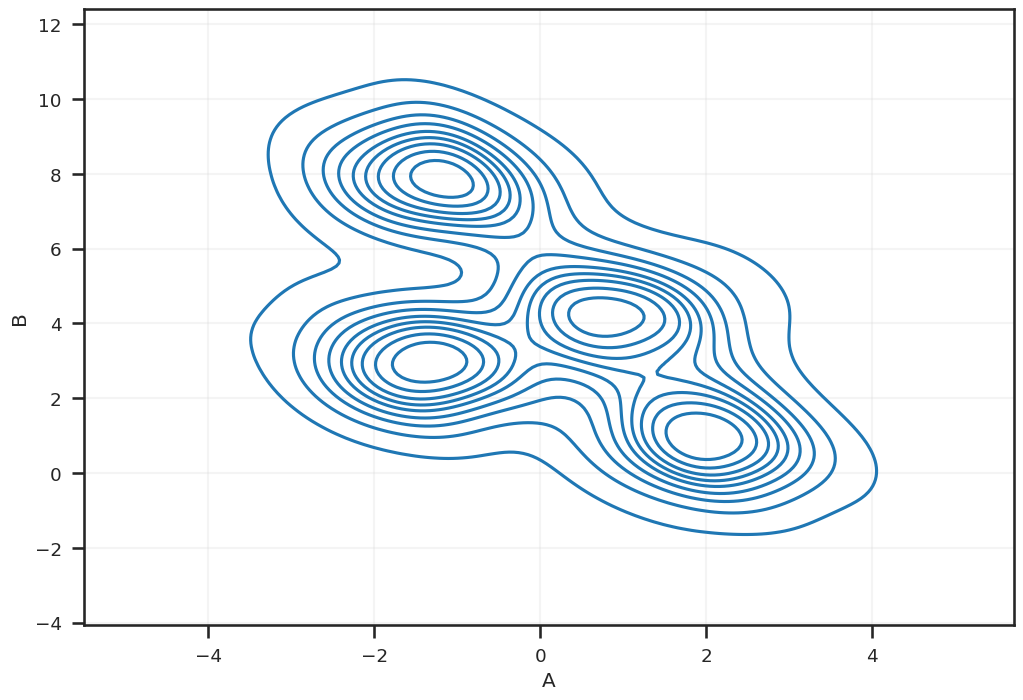

In [170]:
#densidade
sns.kdeplot(data=df, x='A', y='B')


In [171]:
model = MeanShift()
labels = model.fit_predict(X)

In [172]:
#estimando
estimate_bandwidth(X)

2.822735629625506

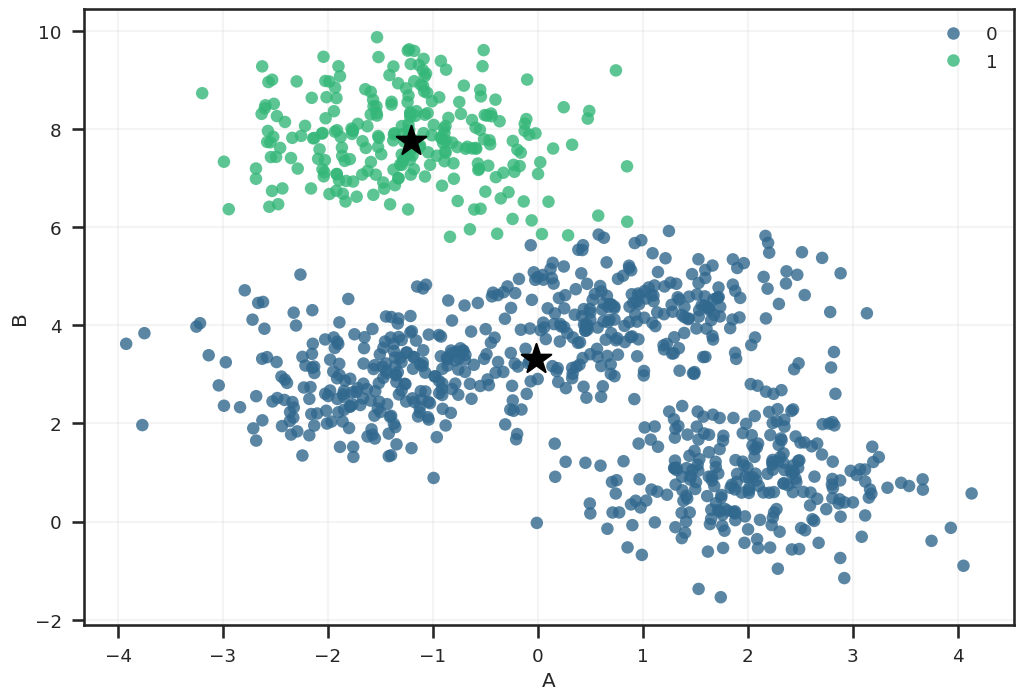

In [173]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

In [174]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

In [175]:
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [176]:
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [177]:
#media das metricas
model.means_

array([[-1.47074945,  2.9161483 ],
       [-1.28890206,  7.85197967],
       [ 0.91251225,  4.26878154],
       [ 1.9950502 ,  0.85843856]])

In [178]:
# covariancia
model.covariances_

array([0.6031149 , 0.61276737, 0.64986761, 0.60506536])

In [179]:
#peso
model.weights_

array([0.24854806, 0.24984566, 0.25196805, 0.24963823])

In [180]:
#bic -  bayesian information criterion
model.bic(X)

7426.42580260849

In [181]:
#predição
model.predict(X)[:5]


array([1, 2, 1, 0, 3])

In [182]:
#probabilidade
model.predict_proba(X)[:5]

array([[2.08874832e-09, 9.99999953e-01, 4.46125372e-08, 1.84520950e-24],
       [1.61264487e-02, 3.01059928e-07, 9.83789133e-01, 8.41171761e-05],
       [2.32527962e-11, 9.99999999e-01, 6.61372416e-10, 4.27922712e-28],
       [9.99991870e-01, 1.70241414e-12, 8.09353136e-06, 3.62544037e-08],
       [9.33091376e-07, 9.88616547e-21, 2.14730008e-04, 9.99784337e-01]])

In [183]:
model.means_.T

array([[-1.47074945, -1.28890206,  0.91251225,  1.9950502 ],
       [ 2.9161483 ,  7.85197967,  4.26878154,  0.85843856]])

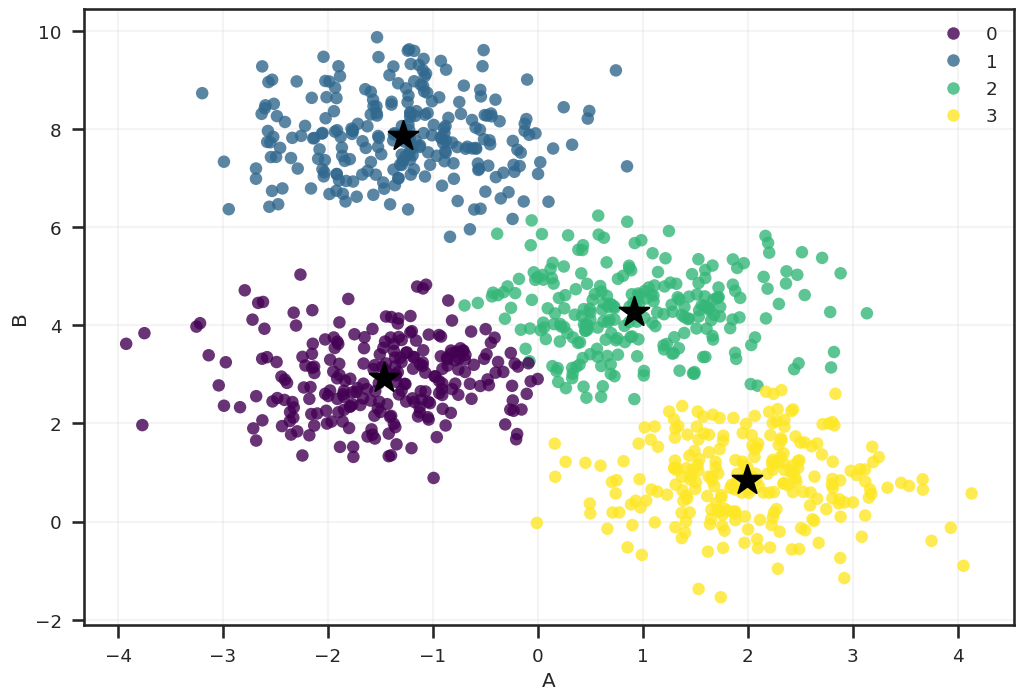

In [184]:
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [185]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.427331,3,full
9,7736.187733,3,tied


In [186]:
results.sort_values('bic').head()

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.446347,4,spherical
17,7442.842241,5,tied
14,7450.139988,4,diag
19,7455.727244,5,spherical


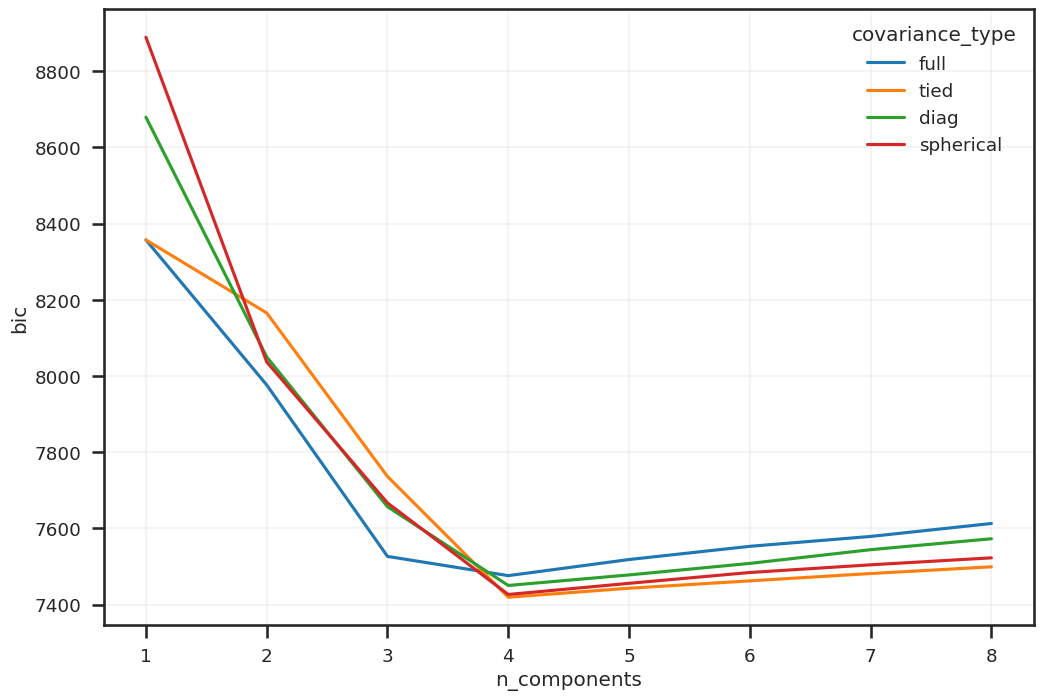

In [187]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

#categoricos


In [188]:
# Load data
from yellowbrick.datasets import load_mushroom
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [189]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


In [190]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

[11560.0, 10343.0, 8851.0, 8111.0, 7203.0, 6708.0, 6416.0, 6190.0, 5882.0]

In [191]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


#mistos

In [192]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [193]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [194]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [195]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

KPrototypes(gamma=0.5)

In [196]:
model.predict(df_diabetes, categorical=categorical_idx)

array([1, 5, 5, 0, 3, 0, 3, 5, 4, 4, 6, 6, 6, 2, 3, 5, 3, 1, 6, 4, 0, 5,
       5, 4, 5, 4, 4, 2, 3, 0, 5, 0, 5, 6, 2, 5, 3, 4, 4, 3, 3, 6, 2, 6,
       6, 6, 5, 6, 2, 6, 6, 3, 0, 5, 3, 0, 5, 6, 5, 3, 3, 6, 5, 2, 4, 5,
       2, 5, 5, 0, 0, 0, 5, 6, 5, 6, 6, 4, 5, 0, 5, 6, 3, 6, 2, 3, 0, 5,
       0, 2, 5, 0, 5, 6, 2, 2, 3, 0, 6, 6, 6, 1, 4, 5, 5, 2, 4, 6, 6, 6,
       4, 4, 3, 5, 6, 5, 5, 0, 5, 6, 7, 6, 5, 6, 5, 5, 0, 4, 5, 3, 4, 6,
       6, 5, 6, 6, 2, 0, 2, 7, 6, 6, 5, 0, 1, 4, 5, 4, 5, 5, 1, 2, 4, 3,
       5, 2, 5, 5, 0, 0, 0, 3, 5, 5, 5, 1, 7, 1, 0, 1, 0, 5, 6, 1, 1, 2,
       0, 3, 2, 7, 7, 1, 3, 0, 1, 6, 0, 7, 5, 5, 7, 2, 2, 1, 1, 1, 1, 0,
       7, 0, 5, 7, 7, 4, 1, 0, 0, 1, 2, 0, 0, 7, 2, 3, 2, 7, 7, 7, 1, 6,
       1, 1, 3, 1, 7, 1, 7, 2, 4, 7, 5, 1, 4, 7, 7, 6, 6, 3, 3, 6, 1, 4,
       1, 7, 2, 6, 3, 4, 4, 1, 7, 6, 7, 7, 4, 6, 7, 2, 4, 5, 4, 0, 7, 0,
       2, 0, 1, 2, 7, 7, 6, 1, 7, 0, 2, 0, 1, 0, 3, 1, 7, 0, 2, 5, 1, 7,
       0, 4, 7, 2, 4, 7, 1, 4, 2, 1, 2, 1, 2, 2, 1,

In [197]:
model.cost_

1055.0633385680317

In [198]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[1566.2403908950237,
 1400.5686510438554,
 1293.7815970820086,
 1226.716334230568,
 1142.6878548150316,
 1100.444866336881,
 1053.5493270171478,
 1012.3556599858969,
 978.6271557658495]

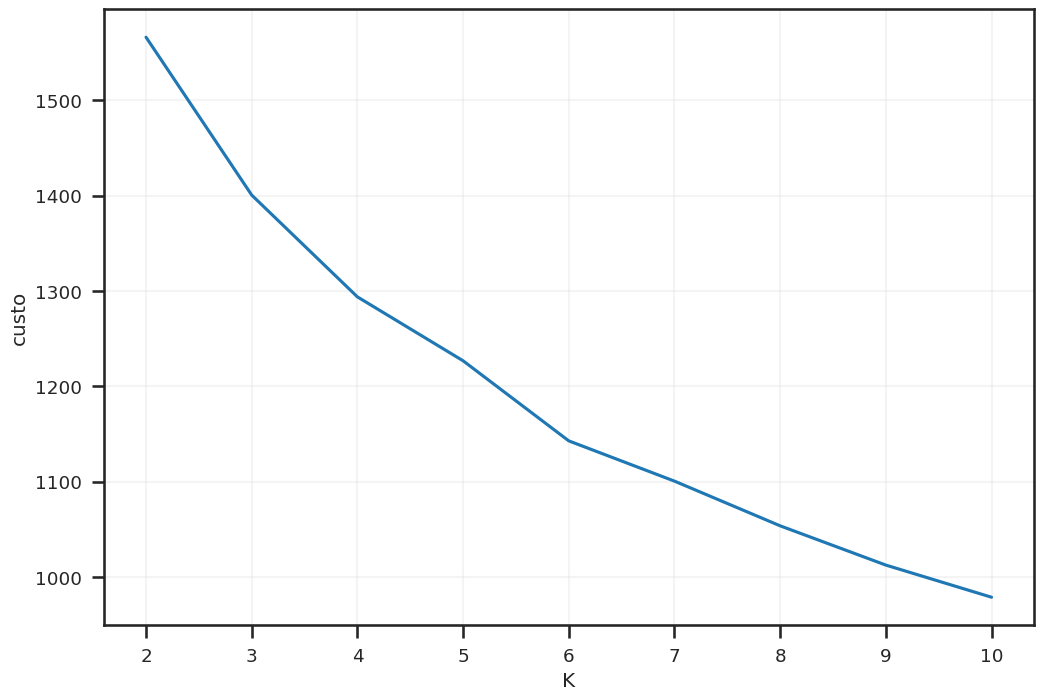

In [199]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()